# Stress Detection.

<img src="https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2021/12/Stress-Detection-from-Social-Media-Posts-with-Machine-Learning.png?fit=1920%2C1080&ssl=1">

<a href="https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv" target="_blank">Data burada</a>

* Stres, ve depresyon, insanların akıl sağlığını tehdit eden önemli sorunlardır. İnsanlar duygularını genellikle sosyal medya platformlarında, Instagram'da gönderi ve hikaye olarak paylaşmaktadır. Bu projede machine learning algoritmalarıyla insanların paylaştığı mesajların sentimentini tahmin edeceğiz ve bunları pozitif ve negatif word clouds yapacağız. Data txt dosyası formatındaydı, onu csv'ye çevirip okuduk.

In [41]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import datetime
import neattext as nt
import neattext.functions as nfx
from PIL import Image
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
df=pd.read_csv('Stress.csv')

In [3]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [4]:
df.shape

(2838, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [6]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['social_timestamp'], unit='s').dt.date # bu sutun timestamp idi. date time yaptım

In [8]:
del df["social_timestamp"]  # ve bu sutunu sildim

In [9]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,date
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,2018-03-21
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,2018-05-22
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,2018-09-03
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,2018-01-20
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,2018-10-17


In [10]:
df['label'].value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

<Axes: xlabel='confidence', ylabel='count'>

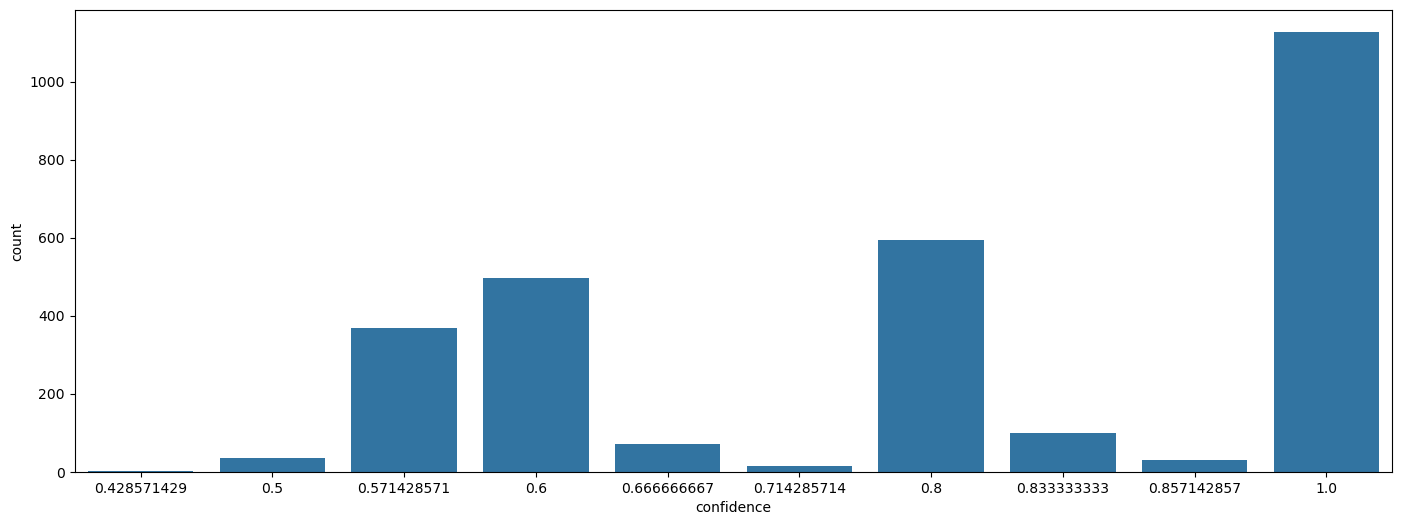

In [11]:
fig=plt.figure(figsize=(17,6))
sns.countplot(x=df['confidence']) # bu sutun mesajların güvenli olduğunu yani labele göre oranını,1 e yakın olanlar daha foğru. ve çoğunlukya zaten

In [12]:
df['confidence'].value_counts()

confidence
1.000000    1128
0.800000     595
0.600000     496
0.571429     369
0.833333      99
0.666667      71
0.500000      34
0.857143      30
0.714286      14
0.428571       2
Name: count, dtype: int64

In [13]:
df['text'].tolist()

['He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.',
 "Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help

In [14]:
df['text']=df['text'].apply(lambda x: nfx.normalize(x))  
# bu paket temizleemedi textimi

In [15]:
df['text'][7] # aynı şekilde kaldı datam 

'  it cleared up and i was okay but. on monday i was thinking about humans and how the brain works and it tripped me out i got worried that because i was thinking about how the brain works that i would lose sleep and i did. that night was bad just like last time.   also yesterday my sleep was bad i woke up like every hour of the night just like last time. i got kind of scared like i did last time but this time i think that this is fake life which is absurd but i just think about it then get really scared then i think rationally then calm down.'

In [16]:
df['cleaned_text'] = df['text'].apply(lambda x: nfx.remove_stopwords(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: nfx.remove_special_characters(x).replace('\n', ' ').strip())
# bunula temizledim textimi

In [17]:
df.head()
# Text sutuumun yanında temizlenmişi de var

,subreddit,post_id,sentence_range,text,label,confidence,date,cleaned_text
0,ptsd,8601tu,"(15, 20)","he said he had not felt that way before, sugge...",1,0.8,2018-03-21,said felt way before suggeted rest trigger ahe...
1,assistance,8lbrx9,"(0, 5)","hey there r/assistance, not sure if this is th...",0,1.0,2018-05-22,hey rassistance sure right place post this goe...
2,ptsd,9ch1zh,"(15, 20)",my mom then hit me with the newspaper and it s...,1,0.8,2018-09-03,mom hit newspaper shocked this knows like play...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,2018-01-20,met new boyfriend amazing kind sweet good stud...
4,survivorsofabuse,9p2gbc,"[0, 5]",october is domestic violence awareness month a...,1,0.8,2018-10-17,october domestic violence awareness month dome...


## Feature Engineering

In [18]:
df['label'] = df['label'].replace({1: 'stress', 0: 'positive'})

In [19]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,date,cleaned_text
0,ptsd,8601tu,"(15, 20)","he said he had not felt that way before, sugge...",stress,0.8,2018-03-21,said felt way before suggeted rest trigger ahe...
1,assistance,8lbrx9,"(0, 5)","hey there r/assistance, not sure if this is th...",positive,1.0,2018-05-22,hey rassistance sure right place post this goe...
2,ptsd,9ch1zh,"(15, 20)",my mom then hit me with the newspaper and it s...,stress,0.8,2018-09-03,mom hit newspaper shocked this knows like play...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",stress,0.6,2018-01-20,met new boyfriend amazing kind sweet good stud...
4,survivorsofabuse,9p2gbc,"[0, 5]",october is domestic violence awareness month a...,stress,0.8,2018-10-17,october domestic violence awareness month dome...


## Data Visualization

<Axes: xlabel='label', ylabel='count'>

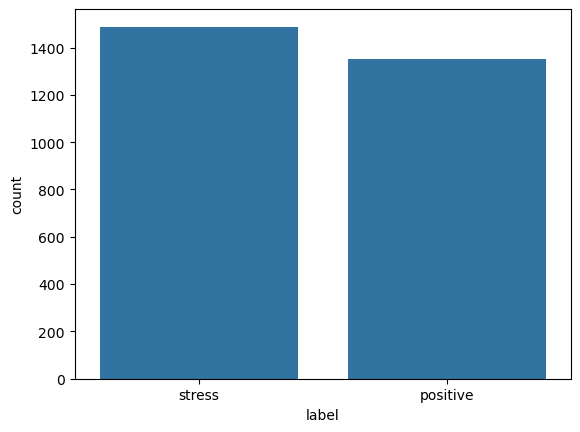

In [20]:
sns.countplot(x=df['label'])

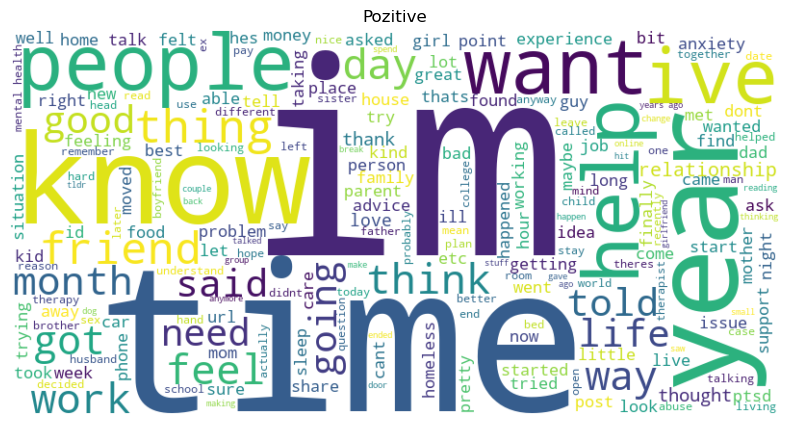

In [21]:
positive_texts = df[df['label'] == 'positive']['cleaned_text']
all_positive_words = ' '.join(positive_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Pozitive')
plt.show()

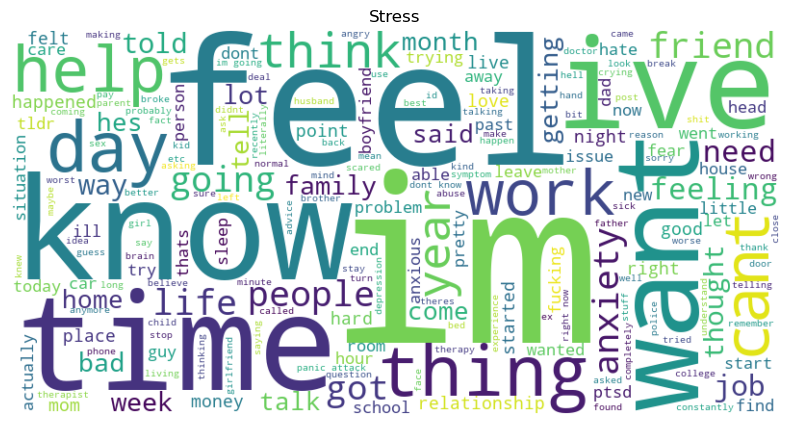

In [22]:
stress_texts = df[df['label'] == 'stress']['cleaned_text']
all_stress_words = ' '.join(stress_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_stress_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Stress')
plt.show()

* Şimdi "text" in label'ini  tahmin eden bi model geliştirelim, textin stressli mi pozitif mi olduğunu tahmin etsin

In [23]:
x=df['cleaned_text']
y=df['label']

In [24]:
pr=PorterStemmer()

In [25]:
def lemmafn(text):   #ekleri kaldırıp kökleri bulma fonksiyonu
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [27]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), analyzer=lemmafn)

In [28]:
x_train_vect = vect.fit_transform(x_train)  # Eğitim verisi için fit_transform
x_test_vect = vect.transform(x_test)

In [29]:
model = MultinomialNB()
model.fit(x_train_vect, y_train)

MultinomialNB()

In [30]:
tahmin = model.predict(x_test_vect)

In [31]:
accuracy_score(tahmin,y_test)

0.7447183098591549

* 2

In [35]:
model = ExtraTreesClassifier()
model.fit(x_train_vect.toarray(), y_train) 

ExtraTreesClassifier()

In [36]:
tahmin = model.predict(x_test_vect.toarray())

In [40]:
print("accuracyscore:", accuracy_score(y_test, tahmin))
print(classification_report(y_test, tahmin))

Doğruluk Skoru: 0.727112676056338
              precision    recall  f1-score   support

    positive       0.74      0.63      0.68       263
      stress       0.72      0.81      0.76       305

    accuracy                           0.73       568
   macro avg       0.73      0.72      0.72       568
weighted avg       0.73      0.73      0.72       568



* 3

In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_vect.toarray(), y_train)

RandomForestClassifier(random_state=42)

In [43]:
tahmin = model.predict(x_test_vect.toarray())

In [45]:
print("accuracyscore:", accuracy_score(y_test, tahmin))
print(classification_report(y_test, tahmin))

accuracyscore: 0.7059859154929577
              precision    recall  f1-score   support

    positive       0.73      0.58      0.65       263
      stress       0.69      0.81      0.75       305

    accuracy                           0.71       568
   macro avg       0.71      0.70      0.70       568
weighted avg       0.71      0.71      0.70       568



In [47]:
tahmin  # tüm textin pozitif mi stress mi olduğunu sıraladı.

array(['positive', 'positive', 'stress', 'positive', 'positive',
       'positive', 'stress', 'positive', 'positive', 'positive', 'stress',
       'stress', 'positive', 'stress', 'positive', 'stress', 'stress',
       'stress', 'stress', 'positive', 'stress', 'positive', 'stress',
       'stress', 'positive', 'positive', 'stress', 'positive', 'positive',
       'positive', 'stress', 'positive', 'positive', 'positive', 'stress',
       'stress', 'stress', 'stress', 'stress', 'stress', 'stress',
       'positive', 'positive', 'positive', 'stress', 'stress', 'stress',
       'stress', 'stress', 'stress', 'stress', 'stress', 'stress',
       'stress', 'stress', 'positive', 'stress', 'stress', 'stress',
       'stress', 'positive', 'stress', 'stress', 'stress', 'stress',
       'positive', 'stress', 'stress', 'stress', 'stress', 'stress',
       'positive', 'stress', 'stress', 'positive', 'stress', 'positive',
       'stress', 'stress', 'stress', 'positive', 'stress', 'stress',
       'stre

* 3 model denedik **MB** modelimiz %74 basarı gösterdi, diğer modellerde ona yakın sonuç verdi. Bu projeyle paylaşılan mesajların stresli mi pozitif mi olduğunu gördük